## Flight Fare Prediction

In [1]:
#Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [32]:
#Load the data
flight_train = pd.read_excel('flight_train.xlsx')

In [33]:
#Check the head
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [34]:
#Check the shape
flight_train.shape

(10683, 11)

In [35]:
#Check the structure of dataset
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [36]:
#Check for any missing data
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Since there is only 1 missing data point, lets remove it


In [37]:
flight_train.dropna(inplace=True)

In [38]:
flight_train.shape

(10682, 11)

**Exploratory Data Analysis**

In [39]:
#Check count of each unique Airlines
flight_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

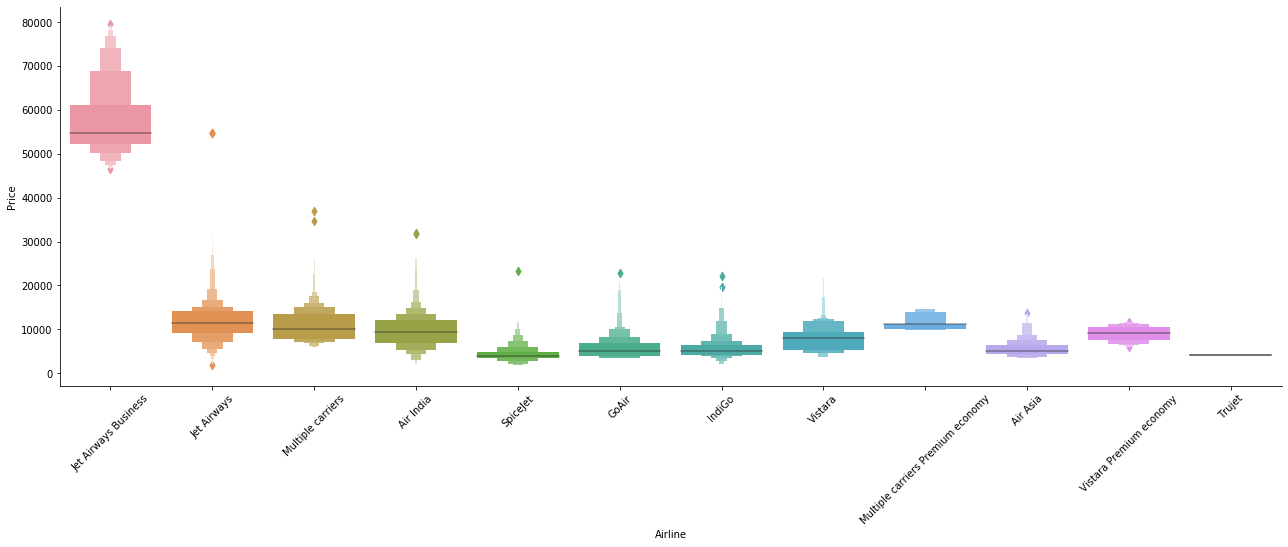

In [40]:
#Plot Airlines vs Price
sns.catplot(x='Airline',y='Price',data=flight_train.sort_values(by="Price",ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation=45)
plt.show()

Jet Airways Business has high price compared to other Airlines.Jet Airways,Air India,Vistara and other Mulptiple Carriers are higher priced than SpiceJet,GoAir,Indigo,Trujet

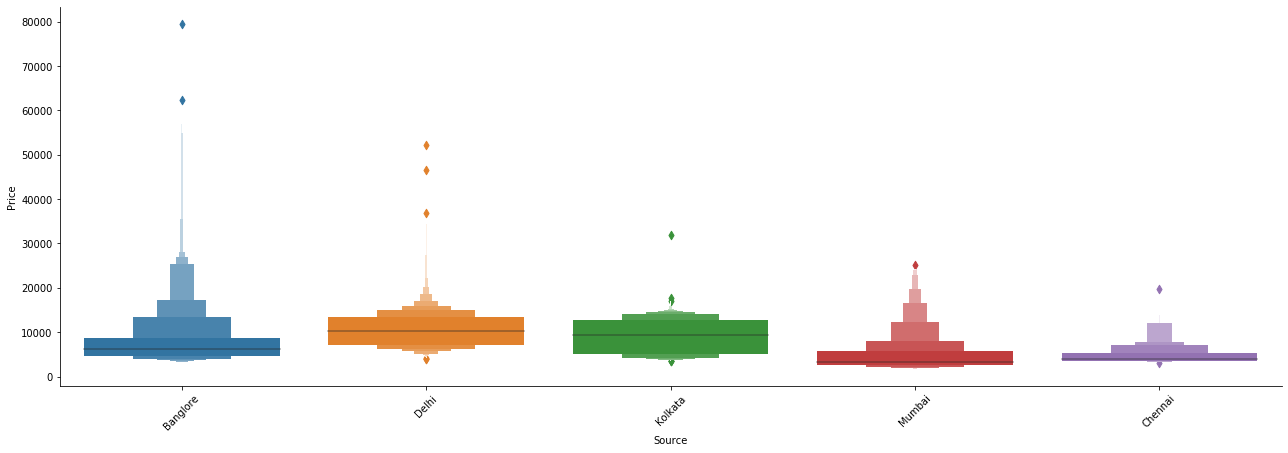

In [41]:
#Source Vs Price
sns.catplot(x='Source',y='Price',data=flight_train.sort_values(by="Price",ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation=45)
plt.show()

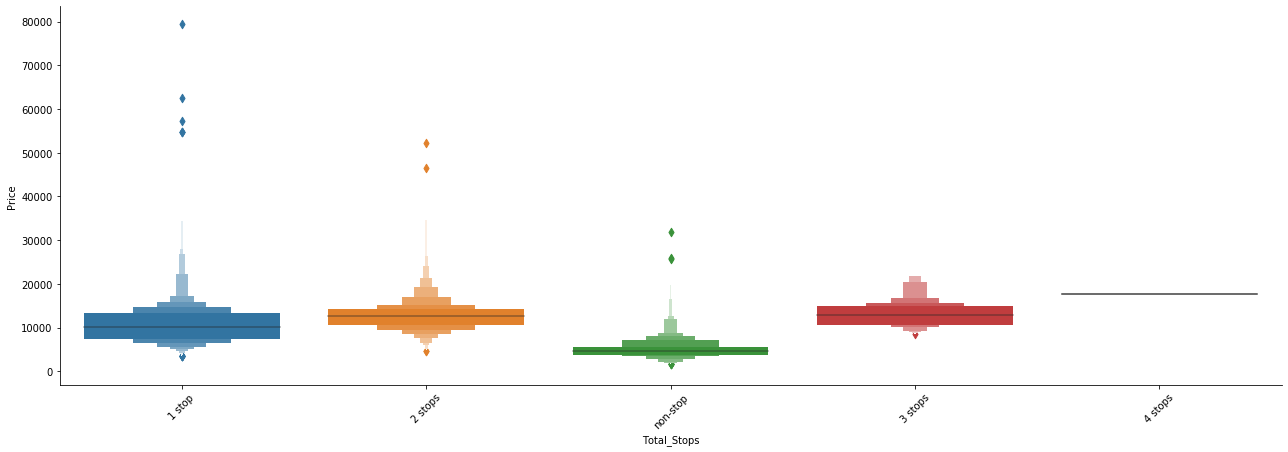

In [42]:
#Stops Vs Price
sns.catplot(x='Total_Stops',y='Price',data=flight_train.sort_values(by="Price",ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation=45)
plt.show()

In [43]:
#Unique destinations
flight_train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [44]:
#Replace New Delhi with Delhi
flight_train['Destination'] = np.where(flight_train['Destination']=='New Delhi','Delhi',flight_train['Destination'])

In [45]:
flight_train['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

**Feature Engineering**

In [46]:
#OneHot Encode Airline, Source and Destination
Airline = pd.get_dummies(flight_train['Airline'],prefix='Airline_',drop_first=True)
Source = pd.get_dummies(flight_train['Source'],prefix='Source_',drop_first=True)
Destination = pd.get_dummies(flight_train['Destination'],prefix='Destination_',drop_first=True)

#Add the one hot encoded data to the main dataset
flight_train = pd.concat([flight_train,Airline,Source,Destination],axis=1)

#Drop the redundant columns
flight_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [47]:
len(flight_train[flight_train['Additional_Info']=='No info'])/len(flight_train)

0.781127129750983

In [48]:
#Since 78% of values in Additional_Info is 'No info', lets drop it
#Also Total_Stops is related to Route lets drop Route as well
flight_train.drop(['Route','Additional_Info'],axis=1,inplace=True)
flight_train.shape

(10682, 25)

In [49]:
flight_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [50]:
#Encode Total_Stops
stops_map = {'non-stop': 0,
             '1 stop': 1,
             '2 stops': 2,
             '3 stops': 3,
             '4 stops': 4
            }

flight_train['Total_Stops'] = flight_train['Total_Stops'].map(stops_map)

In [51]:
#Extract Day and Month from Date_of_Journey
flight_train['Journey_Day'] = pd.to_datetime(flight_train['Date_of_Journey'],format = "%d/%m/%Y").dt.day
flight_train['Journey_Month'] = pd.to_datetime(flight_train['Date_of_Journey'],format = "%d/%m/%Y").dt.month

In [52]:
flight_train.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline__Air India,Airline__GoAir,Airline__IndiGo,Airline__Jet Airways,Airline__Jet Airways Business,Airline__Multiple carriers,Airline__Multiple carriers Premium economy,Airline__SpiceJet,Airline__Trujet,Airline__Vistara,Airline__Vistara Premium economy,Source__Chennai,Source__Delhi,Source__Kolkata,Source__Mumbai,Destination__Cochin,Destination__Delhi,Destination__Hyderabad,Destination__Kolkata,Journey_Day,Journey_Month
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,24,3
1,1/05/2019,05:50,13:15,7h 25m,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,5
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,9,6
3,12/05/2019,18:05,23:30,5h 25m,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12,5
4,01/03/2019,16:50,21:35,4h 45m,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3


In [53]:
#Drop Date_Of_Journey column
flight_train.drop('Date_of_Journey',axis=1,inplace=True)

In [54]:
#Extract Departure hour and minute from Dep_Time
flight_train['Dep_hour'] = pd.to_datetime(flight_train['Dep_Time']).dt.hour
flight_train['Dep_minute'] = pd.to_datetime(flight_train['Dep_Time']).dt.minute

#Drop Dep_Time
flight_train.drop('Dep_Time',axis=1,inplace=True)

In [55]:
#Extract Arrival hour and minute from Arrival_Time
flight_train['Arr_hour'] = pd.to_datetime(flight_train['Arrival_Time']).dt.hour
flight_train['Arr_minute'] = pd.to_datetime(flight_train['Arrival_Time']).dt.minute

#Drop Dep_Time
flight_train.drop('Arrival_Time',axis=1,inplace=True)

In [56]:
flight_train.sample(5)

,Duration,Total_Stops,Price,Airline__Air India,Airline__GoAir,Airline__IndiGo,Airline__Jet Airways,Airline__Jet Airways Business,Airline__Multiple carriers,Airline__Multiple carriers Premium economy,Airline__SpiceJet,Airline__Trujet,Airline__Vistara,Airline__Vistara Premium economy,Source__Chennai,Source__Delhi,Source__Kolkata,Source__Mumbai,Destination__Cochin,Destination__Delhi,Destination__Hyderabad,Destination__Kolkata,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arr_hour,Arr_minute
7115,14h 20m,1,8784,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,21,3,6,40,21,0
2391,11h 5m,1,6171,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,15,4,5,5,16,10
9516,9h 20m,1,6442,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,9,6,6,50,16,10
2328,2h 30m,0,3815,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,15,3,9,0,11,30
603,23h 40m,1,9134,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15,3,8,0,7,40


In [57]:
#Extract hours and minutes from Duration
#Make the format of Duration uniform ie '00h 00m'
dur = []
for i in flight_train['Duration']:
    if len((i.split())) == 1:
        if 'h' in i:
            #Append 0m to the duration if it has only hours
            x = i + ' 0m'
        else:
            #Prepend 0h to the duration if it has only minutes
            x = '0h '+ i
            dur.append(x)
            continue
    else:
        x = i
    dur.append(x)
    
hour = []
minute = []
for i in dur:
    hour.append(int(i.split('h')[0]))
    minute.append(int(i.split()[1][:-1]))

In [58]:
#Create columns for Duration hour and minute and then delete Duration column
flight_train['Duration_hour'] = hour
flight_train['Duration_minute'] = minute

flight_train.drop('Duration',axis=1,inplace=True)

In [59]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 29 columns):
Total_Stops                                   10682 non-null int64
Price                                         10682 non-null int64
Airline__Air India                            10682 non-null uint8
Airline__GoAir                                10682 non-null uint8
Airline__IndiGo                               10682 non-null uint8
Airline__Jet Airways                          10682 non-null uint8
Airline__Jet Airways Business                 10682 non-null uint8
Airline__Multiple carriers                    10682 non-null uint8
Airline__Multiple carriers Premium economy    10682 non-null uint8
Airline__SpiceJet                             10682 non-null uint8
Airline__Trujet                               10682 non-null uint8
Airline__Vistara                              10682 non-null uint8
Airline__Vistara Premium economy              10682 non-null uint8
Source__Chennai     

In [60]:
flight_train.shape

(10682, 29)

**Test data**

In [61]:
flight_test = pd.read_excel('flight_test.xlsx')
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [62]:
print('Test Data structure')
print('-'*80)
flight_test.info()

print('\n'*2)
print('Checking for any missing value')
print('-'*80)
flight_test.dropna(inplace=True)
print(flight_test.isnull().sum())
print('\n'*2)

#Replace New Delhi with Delhi
flight_test['Destination'] = np.where(flight_test['Destination']=='New Delhi','Delhi',flight_test['Destination'])

#OneHot Encode Airline, Source and Destination
Airline = pd.get_dummies(flight_test['Airline'],prefix='Airline_',drop_first=True)
Source = pd.get_dummies(flight_test['Source'],prefix='Source_',drop_first=True)
Destination = pd.get_dummies(flight_test['Destination'],prefix='Destination_',drop_first=True)

#Add the one hot encoded data to the main dataset
flight_test = pd.concat([flight_test,Airline,Source,Destination],axis=1)

#Drop the redundant columns
flight_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)



#Since 78% of values in Additional_Info is 'No info', lets drop it
#Also Total_Stops is related to Route lets drop Route as well
flight_test.drop(['Route','Additional_Info'],axis=1,inplace=True)


#Encode Total_Stops
stops_map = {'non-stop': 0,
             '1 stop': 1,
             '2 stops': 2,
             '3 stops': 3,
             '4 stops': 4
            }

flight_test['Total_Stops'] = flight_test['Total_Stops'].map(stops_map)

#Extract Day and Month from Date_of_Journey
flight_test['Journey_Day'] = pd.to_datetime(flight_test['Date_of_Journey'],format = "%d/%m/%Y").dt.day
flight_test['Journey_Month'] = pd.to_datetime(flight_test['Date_of_Journey'],format = "%d/%m/%Y").dt.month

#Drop Date_Of_Journey column
flight_test.drop('Date_of_Journey',axis=1,inplace=True)


#Extract Departure hour and minute from Dep_Time
flight_test['Dep_hour'] = pd.to_datetime(flight_test['Dep_Time']).dt.hour
flight_test['Dep_minute'] = pd.to_datetime(flight_test['Dep_Time']).dt.minute

#Drop Dep_Time
flight_test.drop('Dep_Time',axis=1,inplace=True)


#Extract Arrival hour and minute from Arrival_Time
flight_test['Arr_hour'] = pd.to_datetime(flight_test['Arrival_Time']).dt.hour
flight_test['Arr_minute'] = pd.to_datetime(flight_test['Arrival_Time']).dt.minute

#Drop Dep_Time
flight_test.drop('Arrival_Time',axis=1,inplace=True)


#Extract hours and minutes from Duration
#Make the format of Duration uniform ie '00h 00m'
dur = []
for i in flight_test['Duration']:
    if len((i.split())) == 1:
        if 'h' in i:
            #Append 0m to the duration if it has only hours
            x = i + ' 0m'
        else:
            #Prepend 0h to the duration if it has only minutes
            x = '0h '+ i
            dur.append(x)
            continue
    else:
        x = i
    dur.append(x)
    
hour = []
minute = []
for i in dur:
    hour.append(int(i.split('h')[0]))
    minute.append(int(i.split()[1][:-1]))
    
#Create columns for Duration hour and minute and then delete Duration column
flight_test['Duration_hour'] = hour
flight_test['Duration_minute'] = minute

flight_test.drop('Duration',axis=1,inplace=True)

print(flight_test.info())
print('\n')
print('Shape of the test data',flight_test.shape)

Test Data structure
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB



Checking for any missing value
--------------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64



<class '

**Feature Selection**

In [63]:
flight_train.columns

Index(['Total_Stops', 'Price', 'Airline__Air India', 'Airline__GoAir',
       'Airline__IndiGo', 'Airline__Jet Airways',
       'Airline__Jet Airways Business', 'Airline__Multiple carriers',
       'Airline__Multiple carriers Premium economy', 'Airline__SpiceJet',
       'Airline__Trujet', 'Airline__Vistara',
       'Airline__Vistara Premium economy', 'Source__Chennai', 'Source__Delhi',
       'Source__Kolkata', 'Source__Mumbai', 'Destination__Cochin',
       'Destination__Delhi', 'Destination__Hyderabad', 'Destination__Kolkata',
       'Journey_Day', 'Journey_Month', 'Dep_hour', 'Dep_minute', 'Arr_hour',
       'Arr_minute', 'Duration_hour', 'Duration_minute'],
      dtype='object')

In [64]:
X = flight_train.drop('Price',axis=1)
X.head()

,Total_Stops,Airline__Air India,Airline__GoAir,Airline__IndiGo,Airline__Jet Airways,Airline__Jet Airways Business,Airline__Multiple carriers,Airline__Multiple carriers Premium economy,Airline__SpiceJet,Airline__Trujet,Airline__Vistara,Airline__Vistara Premium economy,Source__Chennai,Source__Delhi,Source__Kolkata,Source__Mumbai,Destination__Cochin,Destination__Delhi,Destination__Hyderabad,Destination__Kolkata,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Duration_hour,Duration_minute
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,24,3,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,5,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,9,6,9,25,4,25,19,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12,5,18,5,23,30,5,25
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,16,50,21,35,4,45


In [65]:
y = flight_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [66]:
#Find important features using ExtraTreesRegressor
from sklearn.tree import ExtraTreeRegressor

extra_tree = ExtraTreeRegressor(random_state=99)
extra_tree.fit(X,y)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                   max_leaf_nodes=None, min_impurity_decrease=0.0,
                   min_impurity_split=None, min_samples_leaf=1,
                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                   random_state=99, splitter='random')

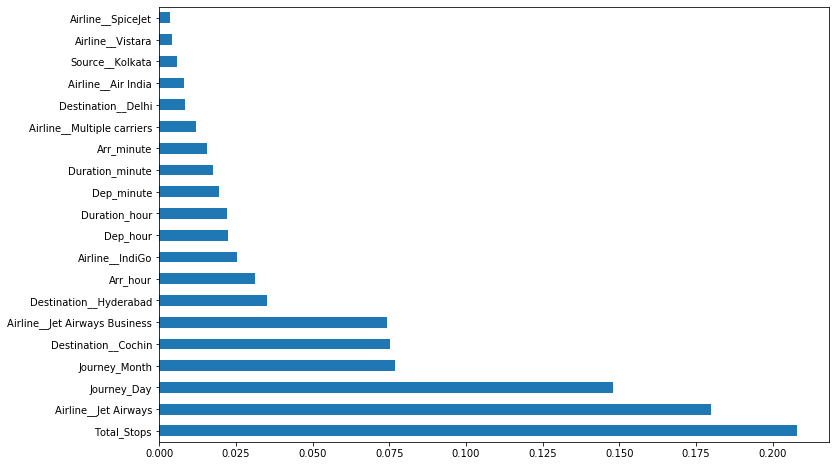

In [67]:
#Plot the feature importance of each feature
plt.figure(figsize=(12,8))
imp_feature = pd.Series(extra_tree.feature_importances_,index=X.columns)
imp_feature.nlargest(20).plot(kind='barh')
plt.show()

**Train-Test split**

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=99)
print('x_train shape',x_train.shape)
print('x_test shape',x_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

x_train shape (8545, 28)
x_test shape (2137, 28)
y_train shape (8545,)
y_test shape (2137,)


**Train the model**

In [69]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor(random_state=99)
gbm_model.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=99, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [70]:
#Make predictions
y_pred = gbm_model.predict(x_test)

In [71]:
#Model Evaluation
MAE = metrics.mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('MAE:',MAE)
print('RMSE:',RMSE)

MAE: 1528.0198942540933
RMSE: 2116.9529467959946


In [72]:
#R-Squared value
metrics.r2_score(y_test,y_pred)

0.7700898441841616

**Hyperparameter Tuning**

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
#Learning_Rate
learning_rate = [0.1,0.05,0.025,0.01,0.005,0.002]

# Number of trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Number of features to consider at every split
max_features = ['auto','sqrt']
subsample = [0.8,0.81,0.82,0.83,0.84,0.85,0.9,1]

In [75]:
#Create the random grid
random_grid = {'learning_rate':learning_rate,
               'n_estimators':n_estimators,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'max_depth':max_depth,
               'max_features':max_features,
               'subsample':subsample}

In [77]:
# Random search of parameters, using 5 fold cross validation, 
# search across 75 different combinations
gbm_random = RandomizedSearchCV(estimator = gbm_model, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 15, cv = 5, 
                               verbose=10, 
                               random_state=99, 
                               n_jobs = -1)

In [78]:
gbm_random.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 21.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [79]:
#Best parameters after Random Search
gbm_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_samples_split': 100,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'learning_rate': 0.01}

In [80]:
#Make new prediction using tuned model
y_pred = gbm_random.predict(x_test)

In [81]:
#Model Evaluation
MAE = metrics.mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('MAE:',MAE)
print('RMSE:',RMSE)

MAE: 1165.6759464918316
RMSE: 1734.3821336205228


In [82]:
#R-Squared value
metrics.r2_score(y_test,y_pred)

0.8456788938183363

**Save the model to reuse it again**


In [83]:
import pickle
file = open('flight_.pkl','wb')
pickle.dump(gbm_random,file)


In [84]:
model = open('flight_gbm_reg.pkl','rb')
saved_model = pickle.load(model)

In [85]:
test_pred = saved_model.predict(x_test)


In [86]:
metrics.r2_score(y_test, test_pred)


0.8456788938183363